In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_parquet('../Dataset/channels_4146.parquet')

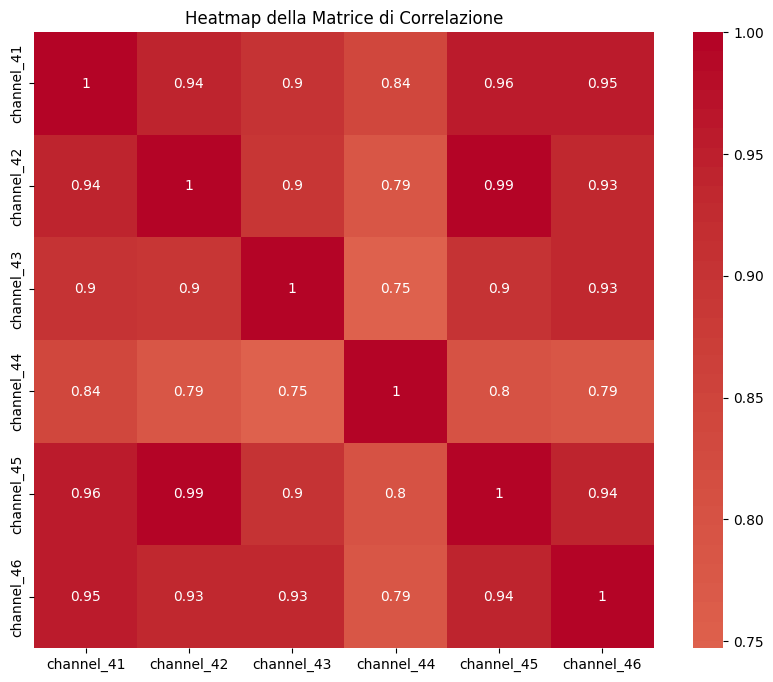

In [3]:
correlation_matrix = df.drop('is_anomaly', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap della Matrice di Correlazione')
plt.show()

# Isolation Forest

In [5]:
'''
model = IForest(contamination=0.11)

model.fit(df.drop('is_anomaly', axis=1))

with open("../Models/IForest_41_46_011.pkl", "wb") as file:
    pickle.dump(model, file)
'''

'\nmodel = IForest(contamination=0.11)\n\nmodel.fit(df.drop(\'is_anomaly\', axis=1))\n\nwith open("../Models/IForest_41_46_011.pkl", "wb") as file:\n    pickle.dump(model, file)\n'

In [6]:
with open("../Models/IForest_41_46_011.pkl", "rb") as file:
    model = pickle.load(file)
df["Anomaly"] = model.labels_

In [7]:
accuracy = accuracy_score(df['is_anomaly'], model.labels_)
precision = precision_score(df['is_anomaly'], model.labels_)
recall = recall_score(df['is_anomaly'], model.labels_)
f1 = f1_score(df['is_anomaly'], model.labels_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9862356340549612
Precision: 0.913975912835871
Recall: 0.9589684373591416
F1 Score: 0.9359317620140193


In [8]:
print("Count labels results")
print(df['Anomaly'].value_counts())

print("\nCount labels truth")
print(df['is_anomaly'].value_counts())

Count labels results
Anomaly
0    13108205
1     1620116
Name: count, dtype: int64

Count labels truth
is_anomaly
0    13184217
1     1544104
Name: count, dtype: int64


is_anomaly
0    773
1    227
Name: count, dtype: int64


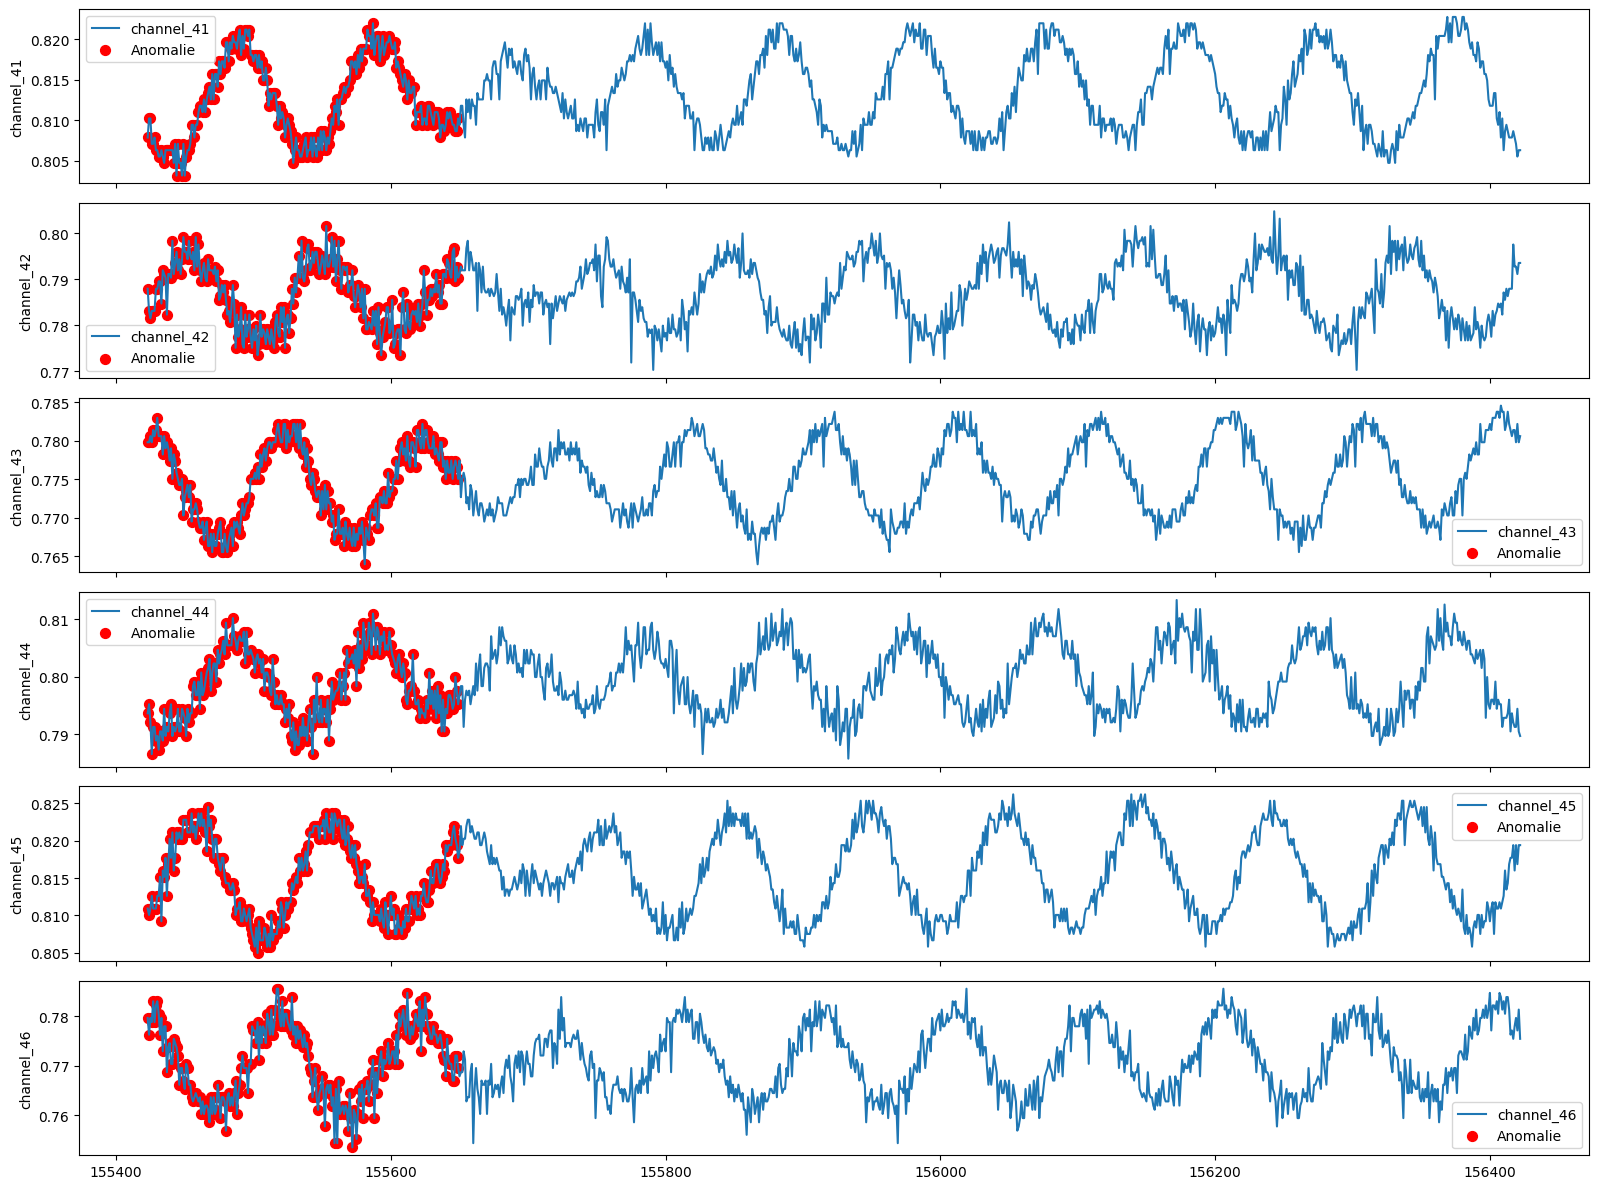

Anomaly
0    715
1    285
Name: count, dtype: int64


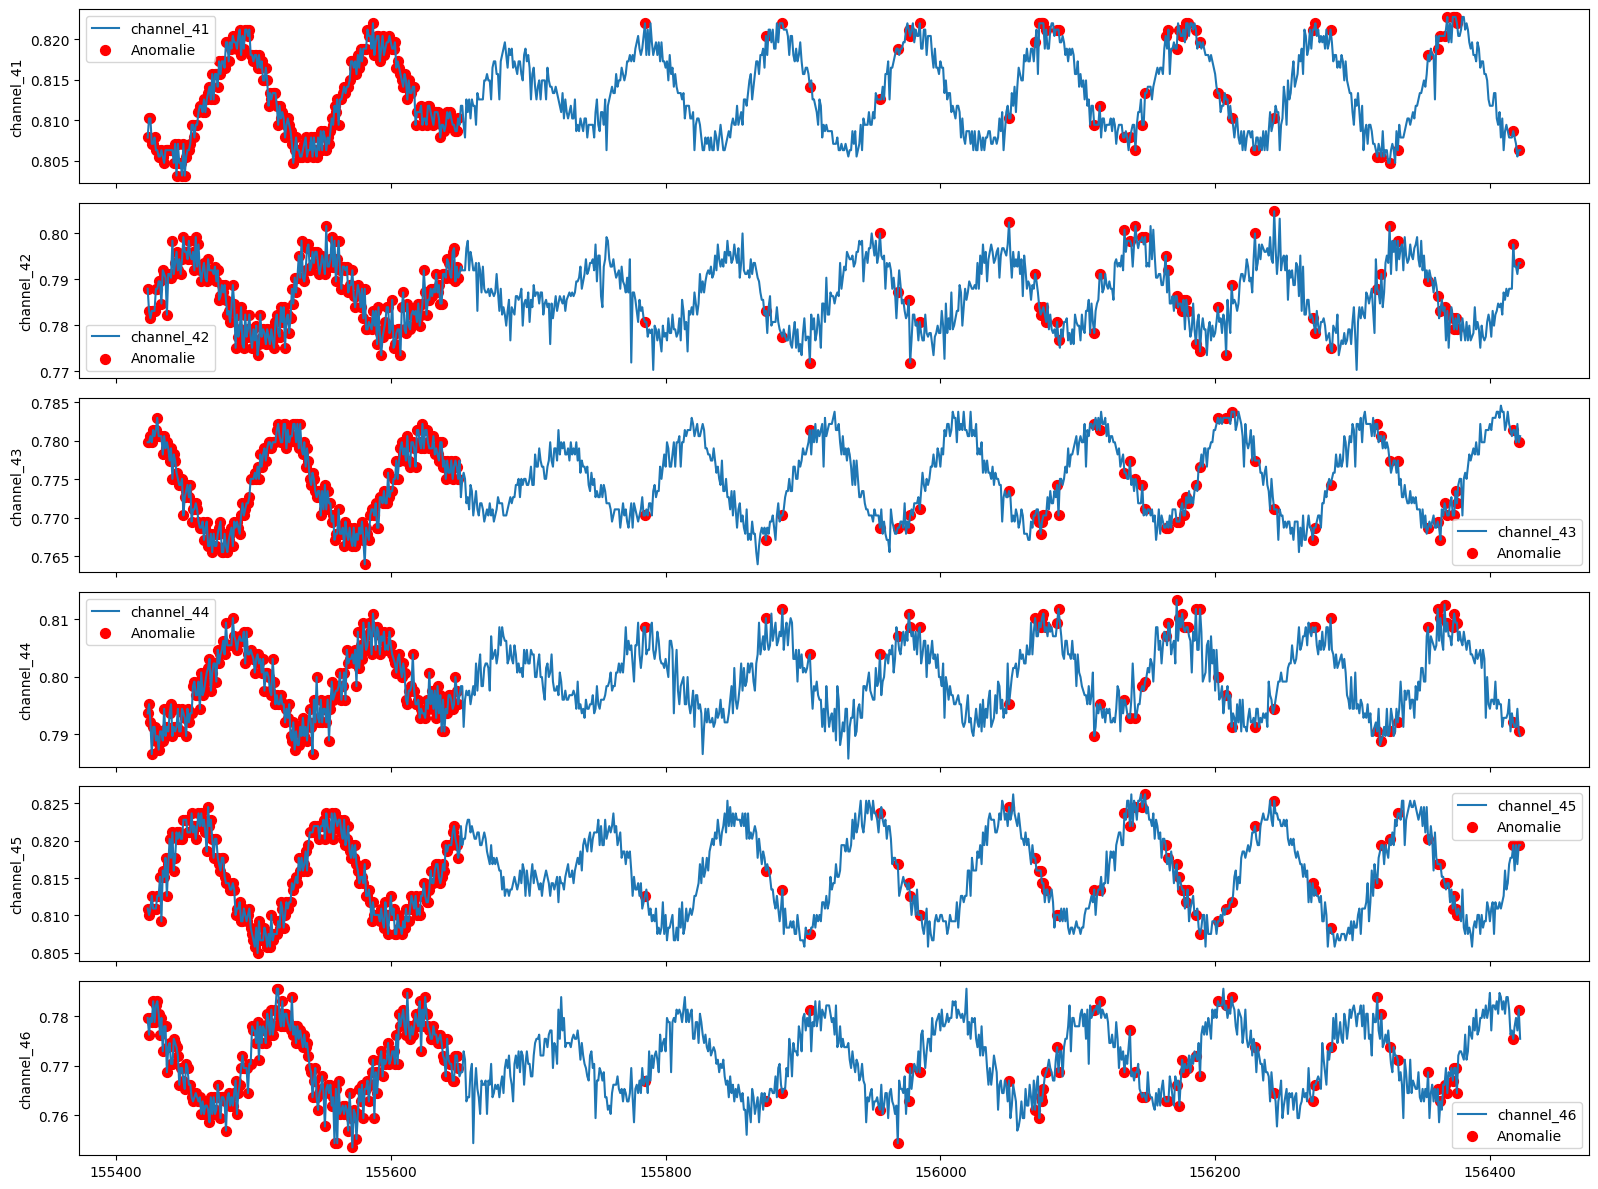

In [9]:
# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# colonna che indica il ground truth delle anomalie
col_anomaly = 'is_anomaly'
n_row_to_plot = 1000
start = df[col_anomaly].idxmax() + 40040


# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'

small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly'
small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Previous elements must be anomalies

In [10]:
n = 10

mask = df["Anomaly"].rolling(window=n, min_periods=1).sum() == n

# Applichiamo la maschera alla Series originale
df["Anomaly_2"] = df["Anomaly"] * mask


accuracy = accuracy_score(df['is_anomaly'], df["Anomaly_2"])
precision = precision_score(df['is_anomaly'], df["Anomaly_2"])
recall = recall_score(df['is_anomaly'], df["Anomaly_2"])
f1 = f1_score(df['is_anomaly'], df["Anomaly_2"])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9809809278328466
Precision: 0.99997072921438
Recall: 0.8186119587799785
F1 Score: 0.9002483117967155


is_anomaly
0    773
1    227
Name: count, dtype: int64


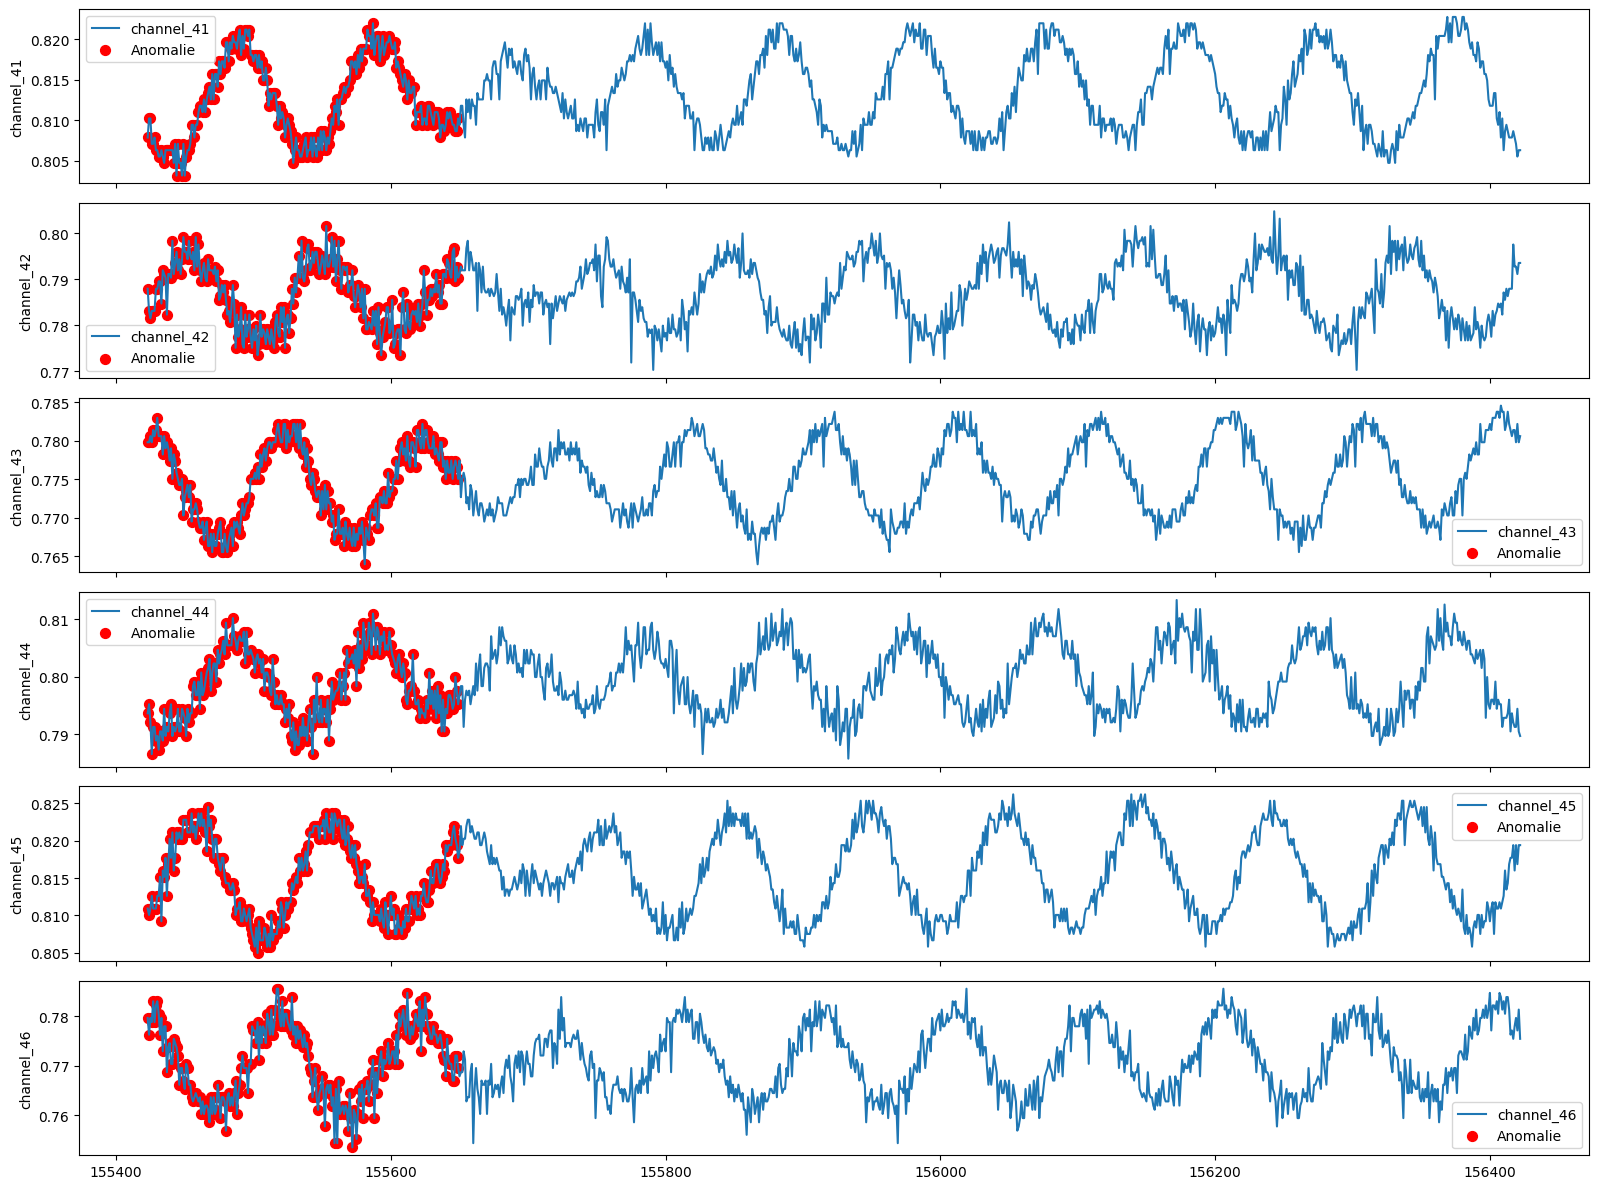

Anomaly_2
0    773
1    227
Name: count, dtype: int64


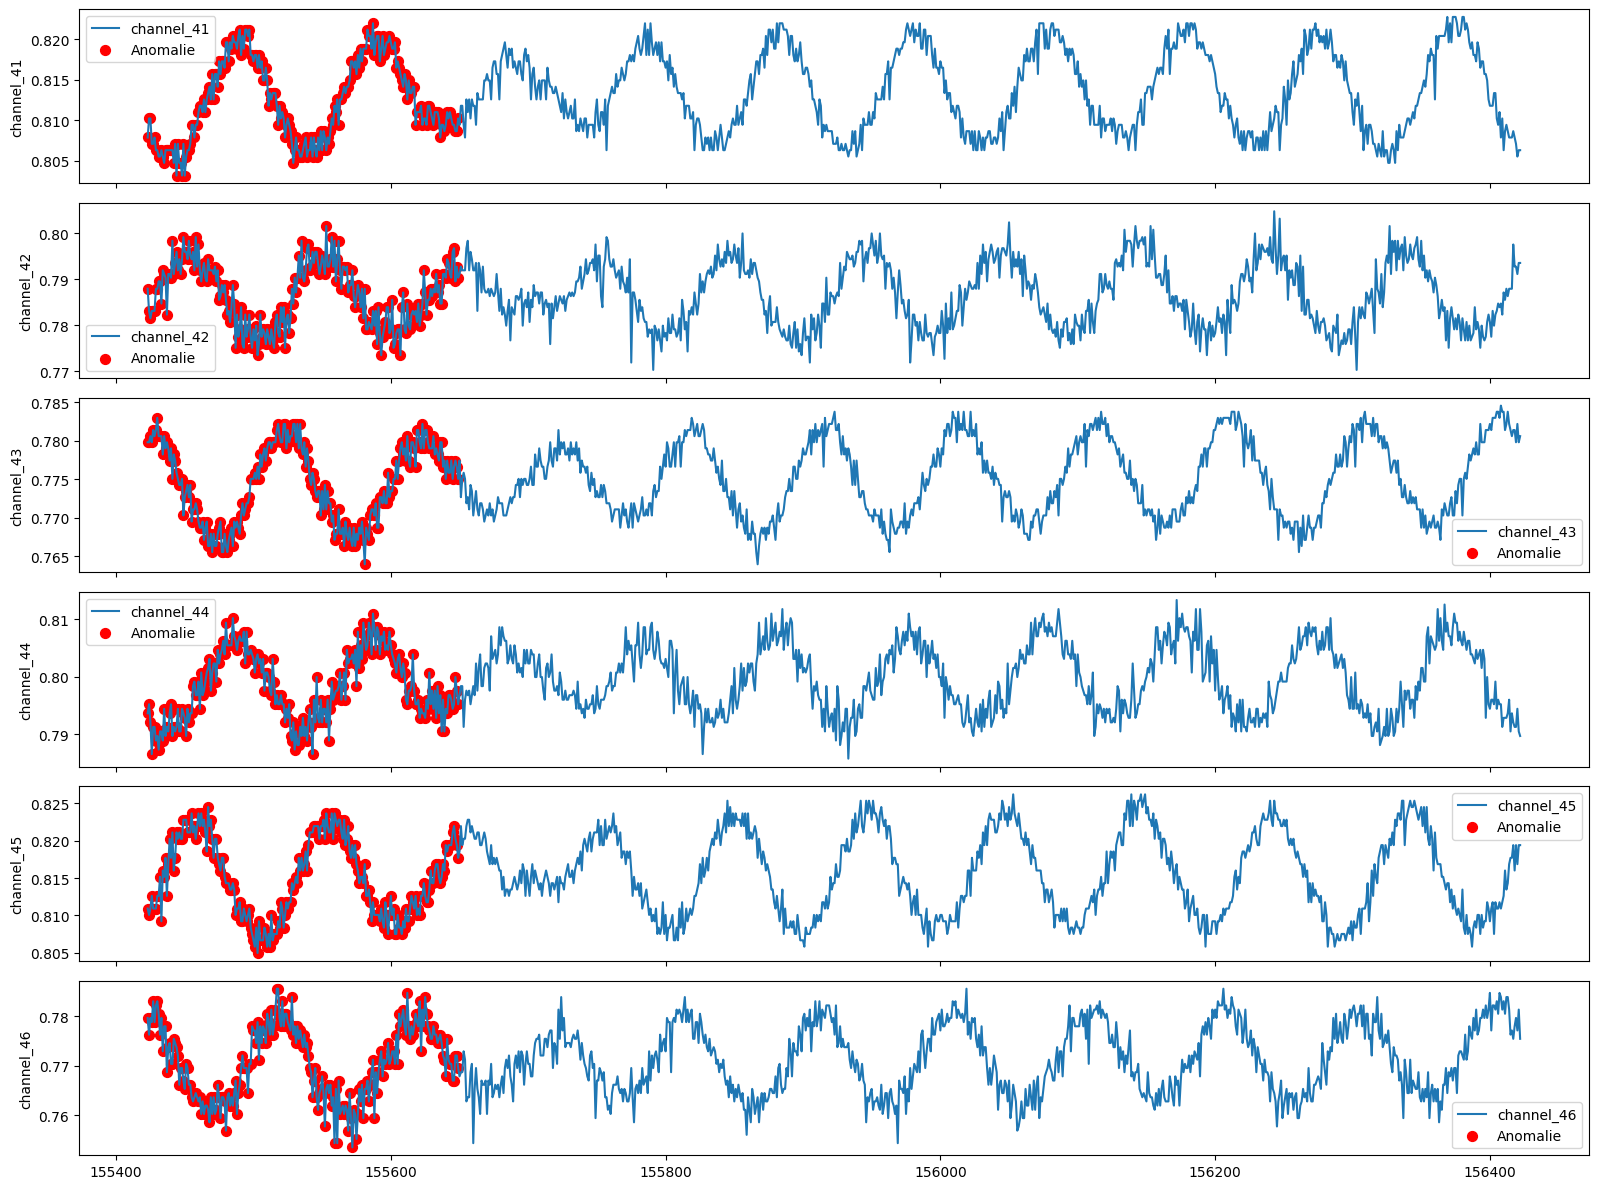

In [11]:
# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# colonna che indica il ground truth delle anomalie
col_anomaly = 'is_anomaly'
n_row_to_plot = 1000
start = df[col_anomaly].idxmax() + 40040


# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'

small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly_2'
small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Groups of anomalies

In [12]:
n = 5

groups = (df["Anomaly"] != df["Anomaly"].shift()).cumsum()
group_sizes = df["Anomaly"].groupby(groups).transform('sum')

# Manteniamo solo i gruppi con almeno n elementi
df["Anomaly_3"] = df["Anomaly"] * (group_sizes >= n)


accuracy = accuracy_score(df['is_anomaly'], df["Anomaly_3"])
precision = precision_score(df['is_anomaly'], df["Anomaly_3"])
recall = recall_score(df['is_anomaly'], df["Anomaly_3"])
f1 = f1_score(df['is_anomaly'], df["Anomaly_3"])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.99260581026174
Precision: 0.9986775593708435
Recall: 0.9307035018366638
F1 Score: 0.9634931330054876


is_anomaly
0    773
1    227
Name: count, dtype: int64


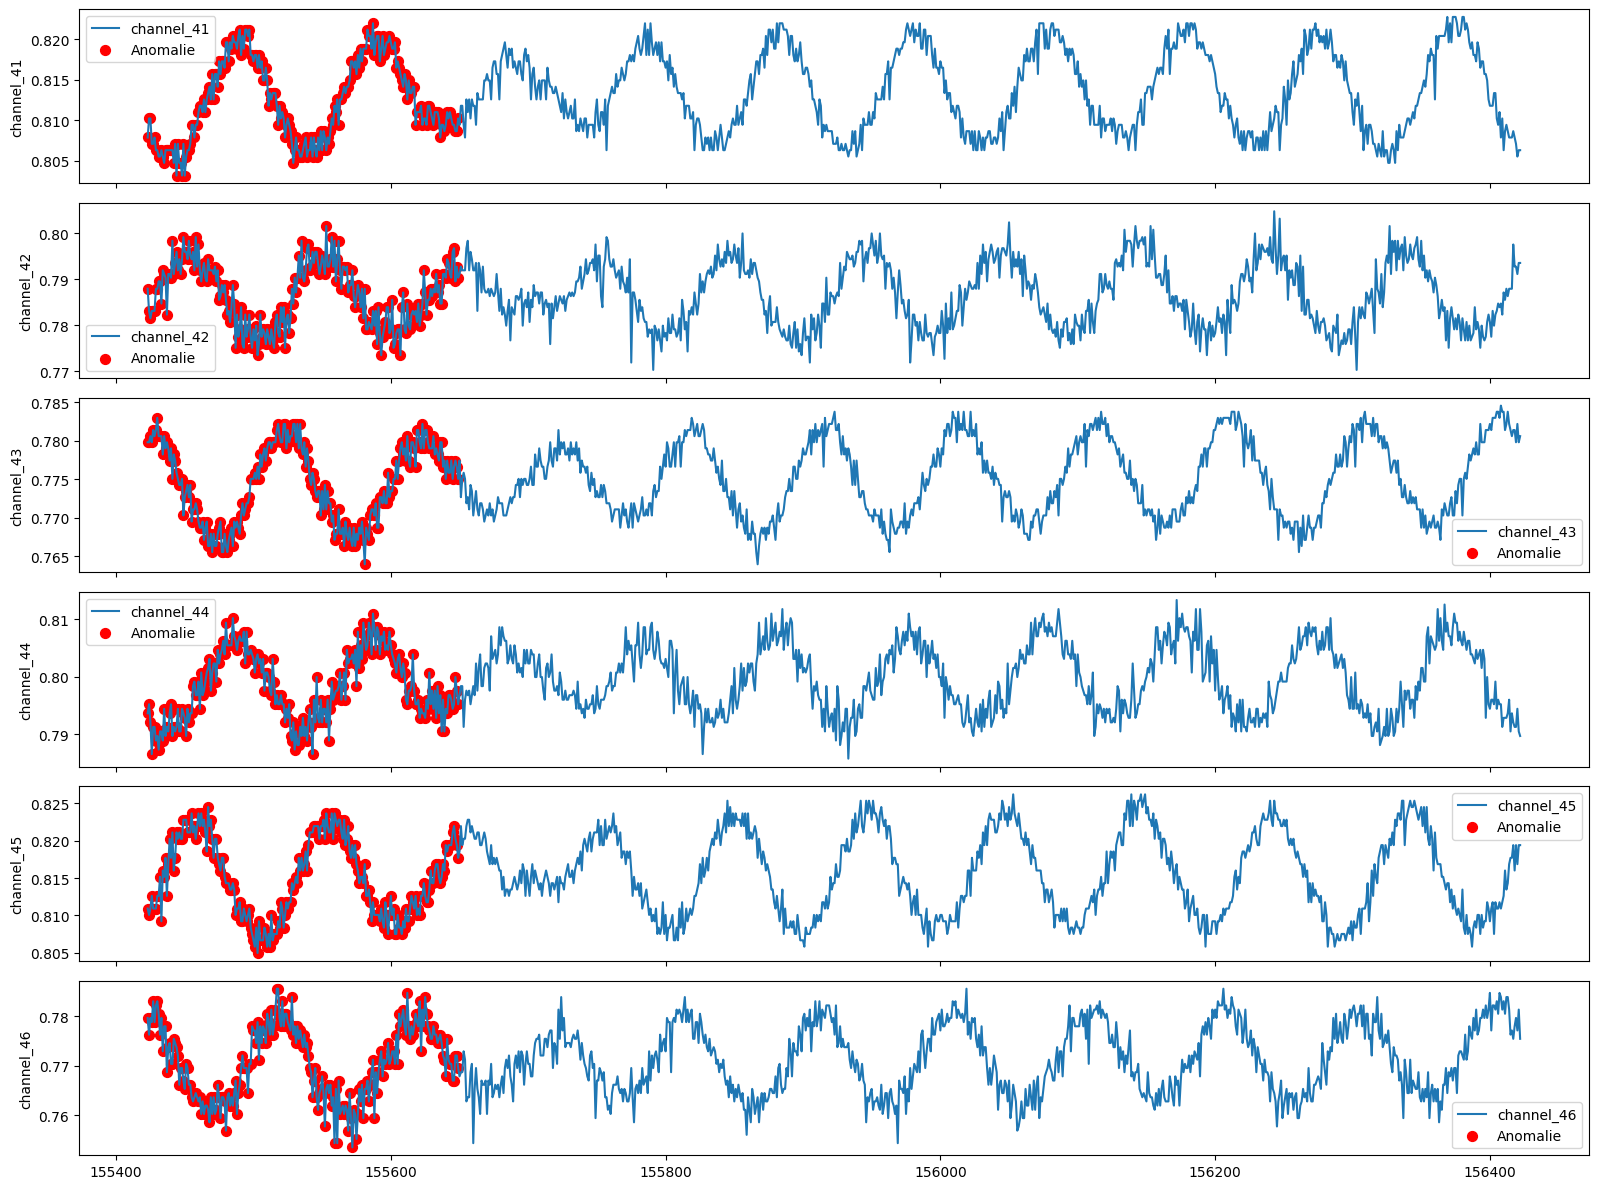

Anomaly_3
0    773
1    227
Name: count, dtype: int64


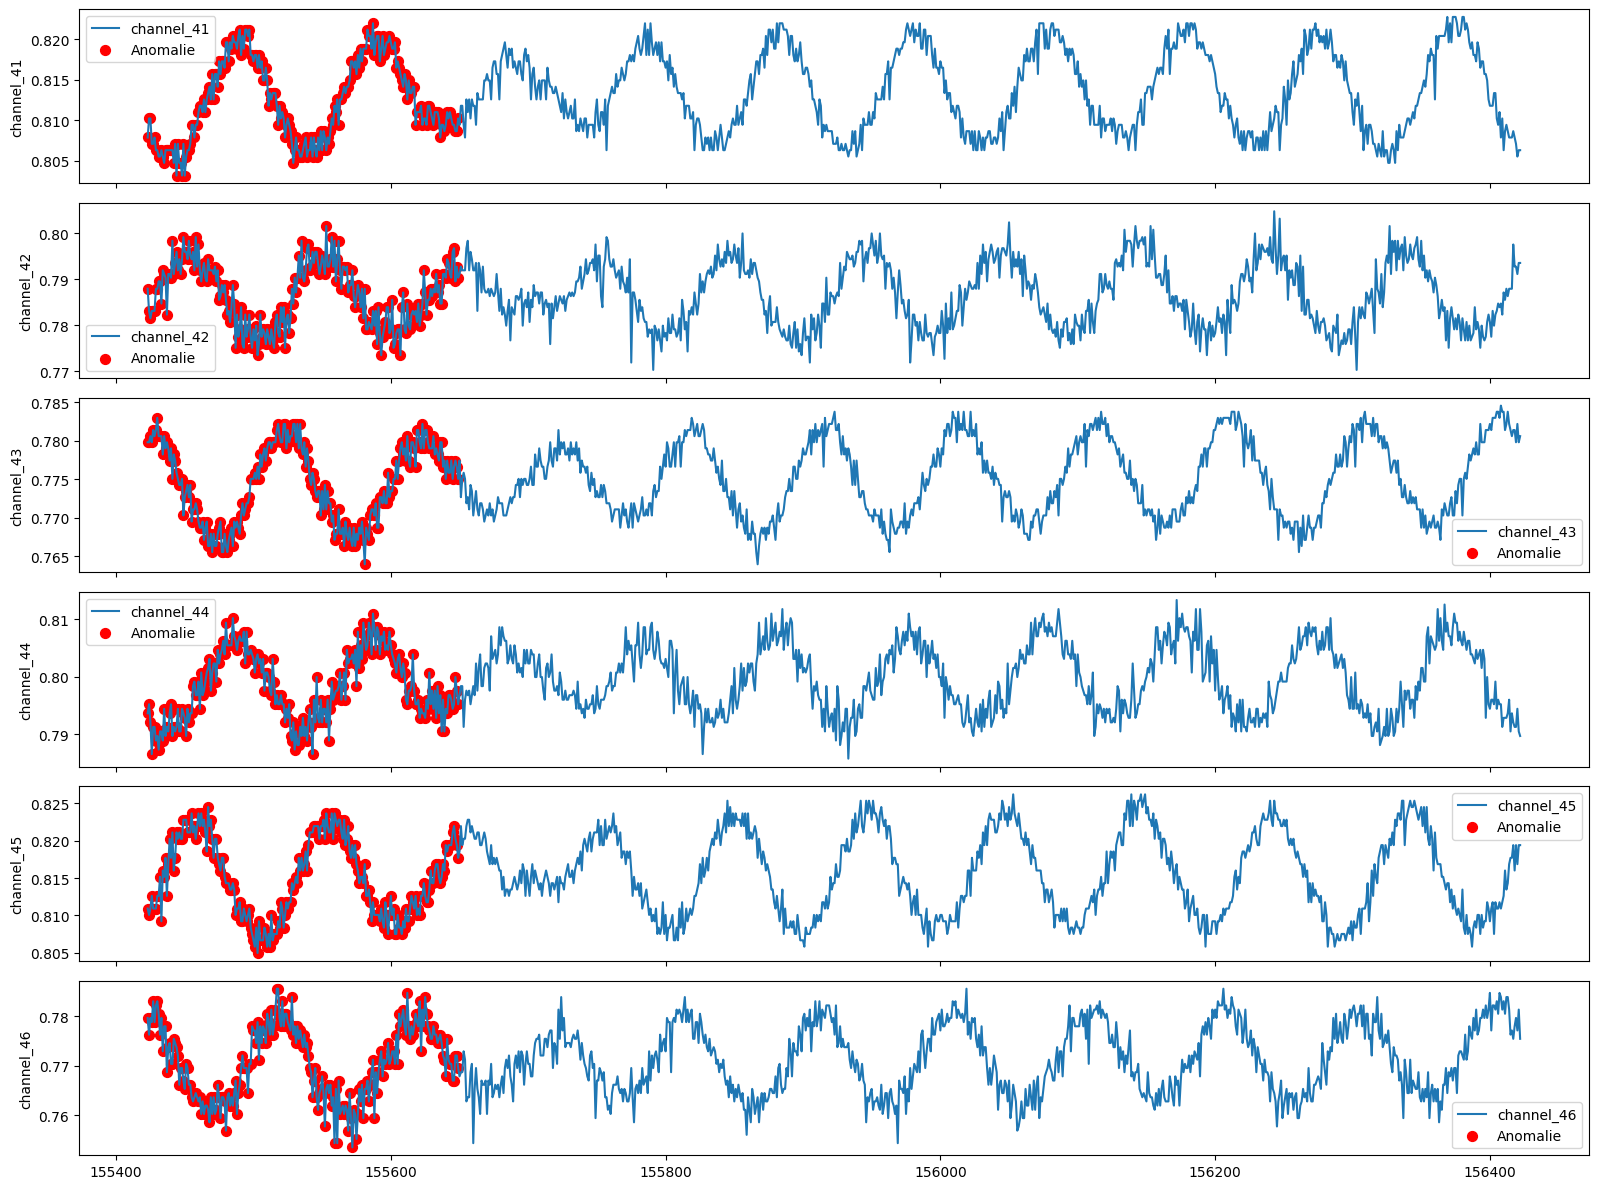

In [13]:
# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# colonna che indica il ground truth delle anomalie
col_anomaly = 'is_anomaly'
n_row_to_plot = 1000
start = df[col_anomaly].idxmax() + 40040


# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'

small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly_3'
small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Lunghezza gruppi di consegutivi 1

In [14]:
groups = (df['is_anomaly'] != df['is_anomaly'].shift()).cumsum()

# Filtra solo i gruppi che contengono 1 e conta la lunghezza
lengths = df['is_anomaly'][df['is_anomaly'] == 1].groupby(groups).size()

# Stampa le lunghezze
print(lengths.tolist())  # Output: [2, 3, 1]

[40267, 11, 681, 11, 38160, 6376, 681, 20, 19, 19, 310, 5, 2542, 449, 660, 19, 18, 17, 17, 20, 8599, 25947, 18, 63, 17, 17, 18, 18, 18, 17, 17, 17, 19, 11, 11, 11, 18, 17, 18, 11264, 3, 21558, 558, 2223, 42956, 6350, 5199, 885, 77, 882, 3, 36942, 354, 1628, 813, 423, 30798, 711, 2701, 6, 6142, 22860, 11402, 660, 135, 31336, 636, 26965, 22811, 6228, 30, 24234, 58, 1068, 66, 333, 413, 24268, 6996, 870, 42741, 270, 7547, 435, 11, 9218, 26745, 20655, 32798, 26204, 29138, 18378, 609, 33, 11345, 882, 1, 1, 639, 20145, 1, 852, 45097, 30819, 1, 810, 288, 924, 258, 29, 31619, 503, 25, 335, 18192, 16230, 702, 129, 9, 20635, 137, 408, 1, 1, 411, 389, 8670, 732, 1, 401, 32741, 116061, 2193, 20640, 34, 333, 5256, 594, 30097, 369, 2, 57, 4359, 18915, 37350, 336, 31857, 35, 45, 1839, 1836, 23558, 276, 1755, 31889, 31326, 51, 187, 1110, 666, 279, 1250, 26425, 1, 25, 1480, 31830, 5136, 10002, 4692, 12945, 32, 27, 23, 30, 45, 67, 711, 68341, 52594, 1, 1986, 19923, 31, 22, 25, 537, 3, 3, 4449]


In [15]:
len(lengths)

190

In [16]:
def find_consecutive_ones(series):
    ones = series[series == 1].index

    if ones.empty:
        return []

    breaks = ones[ones.to_series().diff().ne(1)]  # Identifica i punti di inizio dei gruppi

    # Convertiamo `breaks` in una Series per poter usare `.shift()`
    breaks_series = pd.Series(breaks)

    # Inizio e fine di ogni gruppo
    start_indices = breaks_series.tolist()
    end_indices = (breaks_series.shift(-1, fill_value=ones[-1]) - 1).astype(int).tolist()

    return list(zip(start_indices, end_indices))


groups = find_consecutive_ones(df['is_anomaly'])

print(groups)


[(115383, 161603), (161604, 165174), (165175, 194564), (194565, 225360), (225361, 327271), (327272, 339468), (339469, 429015), (429016, 437160), (437161, 489939), (489940, 506965), (506966, 530798), (530799, 601417), (601418, 610986), (610987, 657837), (657838, 683661), (683662, 730725), (730726, 731065), (731066, 731306), (731307, 783129), (783130, 815086), (815087, 826383), (826384, 852355), (852356, 852456), (852457, 908429), (908430, 913218), (913219, 919420), (919421, 929782), (929783, 937007), (937008, 944977), (944978, 945641), (945642, 973491), (973492, 980943), (980944, 1007203), (1007204, 1007704), (1007705, 1008335), (1008336, 1013494), (1013495, 1013834), (1013835, 1014531), (1014532, 1027317), (1027318, 1144836), (1144837, 1144842), (1144843, 1258194), (1258195, 1284101), (1284102, 1308606), (1308607, 1378151), (1378152, 1442721), (1442722, 1463880), (1463881, 1647279), (1647280, 1661145), (1661146, 1691043), (1691044, 1691058), (1691059, 1748934), (1748935, 1853239), (185

In [17]:
def compute_detection_rate(df, anomaly_col):
    """ Calcola la percentuale di gruppi che contengono almeno un'anomalia """
    groups = find_consecutive_ones(df['is_anomaly'])
    
    detected_count = sum(any(df.loc[start:end, anomaly_col] == 1) for start, end in groups)
    
    total_groups = len(groups)
    detection_rate = detected_count / total_groups if total_groups > 0 else 0

    return detection_rate, detected_count, total_groups

In [18]:
rate, detected, total = compute_detection_rate(df, 'Anomaly')

In [19]:
print(rate)
print(detected)
print(total)

1.0
190
190


# STL

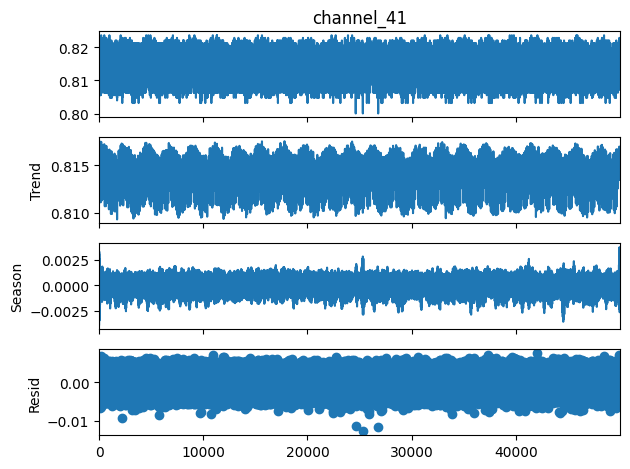

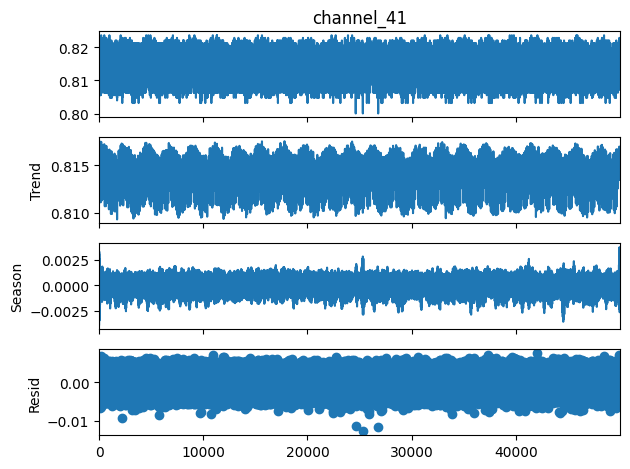

In [11]:
n_elements = 50000
channel = 'channel_41'

from statsmodels.tsa.seasonal import STL
stl = STL(df.iloc[:n_elements]['channel_41'], period=50, robust=True) 
result = stl.fit()

result.plot()

<Axes: ylabel='Frequency'>

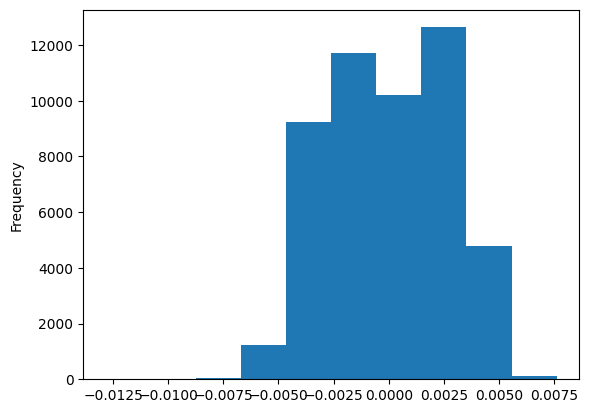

In [12]:
result.resid.plot.hist()

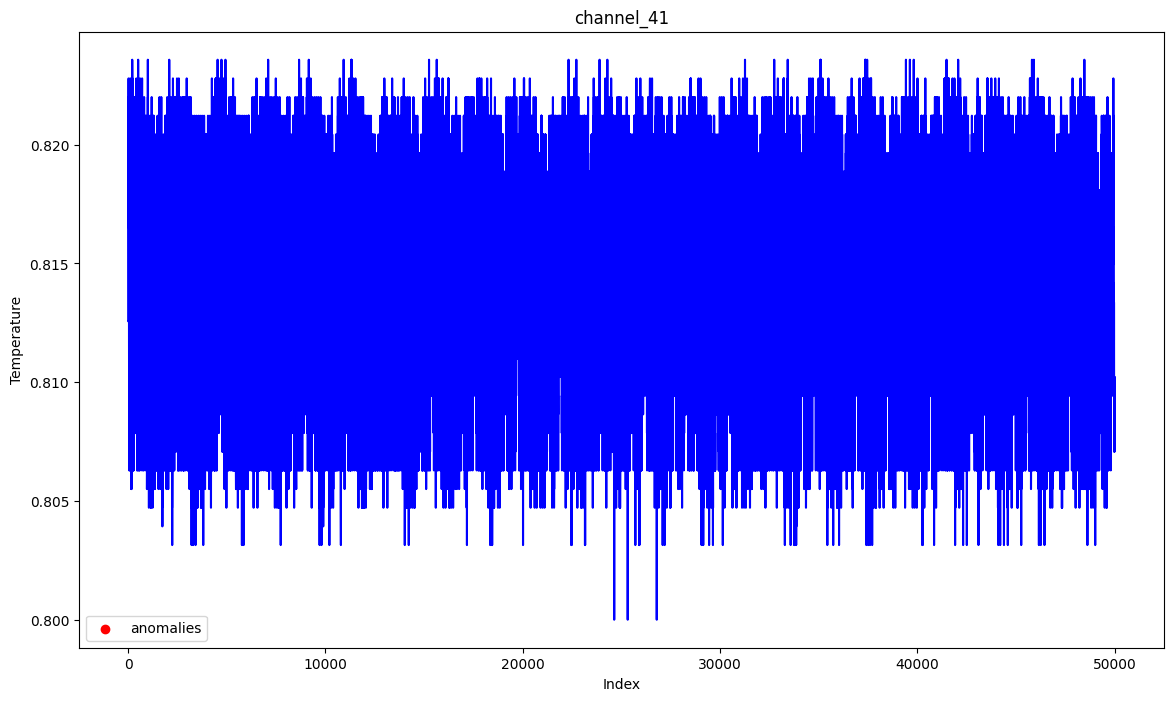

In [13]:
import matplotlib.pyplot as plt


threshold = 5
anomalies_filter = result.resid.apply(lambda x: True if abs(x) > threshold else False)
anomalies = df.iloc[:n_elements][channel][anomalies_filter]
plt.figure(figsize=(14, 8))
plt.scatter(x=anomalies.index, y=anomalies, color="red", label="anomalies")
plt.plot(df.iloc[:n_elements].index, df.iloc[:n_elements][channel], color='blue')
plt.title(channel)
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()